<a href="https://colab.research.google.com/github/AlejandroGuedez/Equipo-23-de-Diplomado-data-scientist/blob/main/TP_Parte_2_Gr23_v_2022_04_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 2 - Grupo 23

**Integrantes:** Franco Amilcar Genolet (francogeno97@gmail.com), Fabian Alejandro Zapata Cerutti (fzc501@gmail.com), Luis Alejandro Guedez Gomez (luis.guedez@dicsys.com), María Laura Mantovani (mantovanimlaura@gmail.com).

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [2]:
#Importamos las librerías que necesitamos para trabajar
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import scipy.stats
import statsmodels.stats.api as smss
seaborn.set_context('talk')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Lectura del dataset
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

Para responder a la pregunta, primero vemos las distribuciones de la variable salario mensual neto agrupadas por la columna `profile_gender`.

In [4]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

Al igual que en la parte 1 del práctico, nos encontramos con que el mínimo de nuestras distribuciones es demasiado bajo e irreal. Establecemos un valor mínimo de \$1000 para poder trabajar sobre datos más realistas:

In [5]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

Podemos ir viendo que la cuenta de hombres en la muestra es significativamente mayor a la de mujeres. Y que "Otros" solo presenta 28 casos. 

Definimos nuestros grupos A (Hombres) y B (Otros géneros).

In [7]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

A continuación tomamos una muestra aleatoria de 50 observaciones del grupo A y una muestra aleatoria del mismo tamaño para el grupo B.

In [8]:
n_A = 50
n_B = 50

Muestra_A = groupA.sample(n_A, replace=False,random_state=1)
Muestra_B = groupB.sample(n_B, replace=False,random_state=1)

Para la estimación puntual de la media poblacional usamos la media muestral:

In [9]:
Muestra_A_mean = Muestra_A.mean()
Muestra_B_mean = Muestra_B.mean()
print(Muestra_A_mean)
print(Muestra_B_mean)


90903.6
75990.4972


La estimación puntual de la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros se obtiene restando la media de A y la media de B:

In [10]:
AmenosB = Muestra_A.mean() - Muestra_B.mean()
print('La estimación puntual de la diferencia entre los salarios netos de A y B es: ',AmenosB)

La estimación puntual de la diferencia entre los salarios netos de A y B es:  14913.102800000008


Calculamos el desvío estándar de las muestras.

In [11]:
Muestra_A_std = Muestra_A.std()
Muestra_B_std = Muestra_B.std()
print(Muestra_A_std)
print(Muestra_B_std)

50991.95100629682
38281.80698247742


Vemos que las varianzas de las muestras difieren.

Para calcular el intervalo de confianza para la diferencia de medias usamos la función CompareMeans, varianzas diferentes.

In [12]:
X1 = Muestra_A
X2 = Muestra_B

cm = smss.CompareMeans(smss.DescrStatsW(X1), smss.DescrStatsW(X2))
print(cm.tconfint_diff(alpha=0.05,usevar='unequal'))

(-2999.0727617312623, 32825.27836173128)


La interpretación de este resultado es que la diferencia de Medias entre el Grupo A y el Grupo B estará entre los valores \-$2.999  y \$32.825 con una confianza del 95%. 

Esto sería equivalente a platear un test de hipótesis en el que la hipótesis nula establezca que la media del salario neto del grupo A es igual a la media del salario neto del grupo B. Con el resultado de este test no podemos rechazar la hipótesis nula de que las medias son iguales, ya que el intervalo incluye el valor cero (indicando que es posible que las medias sean iguales).

Aumentamos el tamaño de la muestra para mejorar el intervalo.

In [13]:
n_A_100 = 100
n_B_100 = 100

Muestra_A_100 = groupA.sample(n_A_100, replace=False,random_state=1)
Muestra_B_100 = groupB.sample(n_B_100, replace=False,random_state=1)

Muestra_A_100_mean = Muestra_A_100.mean()
Muestra_B_100_mean = Muestra_B_100.mean()
print('Media de la muestra A:', Muestra_A_100_mean)
print('Media de la muestra B:', Muestra_B_100_mean)

AmenosB_100 = Muestra_A_100.mean() - Muestra_B_100.mean()
print("La diferencia de medias entre A y B es:", AmenosB_100)

Muestra_A_100_std = Muestra_A_100.std()
Muestra_B_100_std = Muestra_B_100.std()
print('Desvío estándar de la muestra A:', Muestra_A_100_std)
print('Desvío estándar de la muestra B:', Muestra_B_100_std)

Media de la muestra A: 95812.9
Media de la muestra B: 75820.1123
La diferencia de medias entre A y B es: 19992.7877
Desvío estándar de la muestra A: 69050.66690620671
Desvío estándar de la muestra B: 40334.017214063315


In [14]:
X1 = Muestra_A_100
X2 = Muestra_B_100

cm = smss.CompareMeans(smss.DescrStatsW(X1), smss.DescrStatsW(X2))
print(cm.tconfint_diff(alpha=0.05,usevar='unequal'))

(4199.593251853588, 35785.98214814642)


Al aumentar el tamaño de la muestra, los resultados obtenidos permiten rechazar la hipótesis nula de igualdad entre las medias. Podemos decir con un 95% de confianza que la media del grupo A es diferente (mayor, ya que el intervalo está dentro de los valores positivos) a la del grupo B.

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis**

$H_0$ = Los hombres cobran igual que los otros géneros

$H_1$ = Los hombres cobran diferente a los otros géneros

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


El estadístico que se usa para estimar la diferencia de medias es t que por el test de Welch se define como la siguiente fórmula:


El estadístico que se usa para estimar la diferencia de medias es t que por el test de Welch se define como la siguiente fórmula: 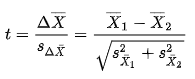

con: 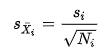

donde image.png y image.png son la media muestral y el error estándar muestral para el iésimo grupo, para un determinado desvío estándar image.png y tamaño muestral image.png

Este estadístico tiene una distribución t-student con grados de libertad 𝒱 que pueden aproximarse con la siguiente fórmula:

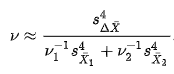

Fuentes: [Wikipedia](https://en.wikipedia.org/wiki/Welch%27s_t-test) y [Stackoverflow](https://stackoverflow.com/questions/31768464/confidence-interval-for-t-test-difference-between-means-in-python).

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

Usando el método summary de la función CompareMeans podemos encontrar el p-valor:

In [27]:
print(cm.summary(use_t=True,alpha=0.05,usevar='unequal')) 

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1   1.999e+04   7996.767      2.500      0.013    4199.593    3.58e+04


El p-valor obtenido es de 0.013, es decir que la probabilidad de que las medias de los dos grupos sean iguales (de que hayamos obtenido estos resultados siendo $H_0$ cierta) es de 1.3%. Con un alpha de 0.05 rechazamos la hipótesis de igualdad de medias para Hombres y otros géneros.

Se obtienen idénticos resultados usando la función `stats.ttest_ind()`:

In [29]:
from scipy import stats
import plotly.graph_objects as go

stats.ttest_ind(Muestra_A_100, Muestra_B_100,equal_var=False)

Ttest_indResult(statistic=2.5001089558924163, pvalue=0.013426243950173958)

Podemos ver las distribuciones de nuestra muestra con el siguiente gráfico:

In [31]:
flg = go.Figure()
flg.add_trace(go.Box(y=Muestra_A_100,name="Hombres"))
flg.add_trace(go.Box(y=Muestra_B_100,name="Otros géneros"))
flg.update_layout(
    title={
        'text':"Salario por grupo",
        'y': 0.9,
        'x': 0.9,
        'xanchor':'center',
        'yanchor':'top'
    }
)
flg.show()

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [48]:
from statsmodels.stats.power import  tt_ind_solve_power
import math
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
n_80 = tt_ind_solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, power=0.8, ratio=ratio)
n_90 = tt_ind_solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, power=0.9, ratio=ratio)
n_95 = tt_ind_solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, power=0.95, ratio=ratio)
print('Para una potencia del 80%, n tendrá que ser de',math.ceil(n_80),'observaciones.')
print('Para una potencia del 90%, n tendrá que ser de',math.ceil(n_90),'observaciones.')
print('Para una potencia del 95%, n tendrá que ser de',math.ceil(n_95),'observaciones.')

Para una potencia del 80%, n tendrá que ser de 299 observaciones.
Para una potencia del 90%, n tendrá que ser de 399 observaciones.
Para una potencia del 95%, n tendrá que ser de 493 observaciones.


Podemos ver la potencia que tuvo nuestro test (n=100):

In [52]:
power = tt_ind_solve_power(effect_size=effect_size, nobs1=100, alpha=0.05, power=None, ratio=ratio)
print('La potencia del test usando n=100 es de',power)

La potencia del test usando n=100 es de 0.3645307228882372


In [53]:
print('La probabilidad de cometer error tipo 2 es igual a',1-power)

La probabilidad de cometer error tipo 2 es igual a 0.6354692771117628


Esto quiere decir que había un 64% de probabilidad de que **no** rechacemos $H_0$ siendo $H_0$ falsa. 

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.
